In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
!pip install miceforest
import miceforest as mf

In [63]:
# Загрузка данных
file_path = 'lab1_data.xlsx'
data = pd.read_excel(file_path)
display(data)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7 777,14 918,2 825,2 009,1 841,сenter
1,Брянская область,4 560,10 211,1 538,1 418,837,NaN
2,Владимирская область,5 802,8 902,1 703,1 468,NaN,сenter
3,Воронежская область,NaN,17 186,3 362,2 458,4 347,сenter
4,Ивановская область,4 495,5 649,1 338,977,1 288,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2 954,7 211,929,977,829,dv
81,Магаданская область,787,1 215,331,202,97,dv
82,Сахалинская область,3 332,4 511,792,507,131,dv
83,Еврейская автономная область,803,NaN,175,187,57,dv


In [64]:
# Обработка проблемы с неразрывным пробелом
data_cleaned = data.replace(to_replace='\xa0', value='', regex=True)
display(data_cleaned)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777,14918,2825,2009,1841,сenter
1,Брянская область,4560,10211,1538,1418,837,NaN
2,Владимирская область,5802,8902,1703,1468,NaN,сenter
3,Воронежская область,NaN,17186,3362,2458,4347,сenter
4,Ивановская область,4495,5649,1338,977,1288,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954,7211,929,977,829,dv
81,Магаданская область,787,1215,331,202,97,dv
82,Сахалинская область,3332,4511,792,507,131,dv
83,Еврейская автономная область,803,NaN,175,187,57,dv


In [65]:
# Преобразование категориальных данных и исключение аномалий
teacher_categories = ['x1', 'x2', 'x3', 'x4', 'x5']
data_cleaned[teacher_categories].convert_dtypes()

for category in teacher_categories:
    data_cleaned[category] = pd.to_numeric(data_cleaned[category], errors='coerce')

data_cleaned.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.0,14918.0,2825.0,2009.0,1841.0,сenter
1,Брянская область,4560.0,10211.0,1538.0,1418.0,837.0,NaN
2,Владимирская область,5802.0,8902.0,1703.0,1468.0,NaN,сenter
3,Воронежская область,NaN,17186.0,3362.0,2458.0,4347.0,сenter
4,Ивановская область,4495.0,5649.0,1338.0,977.0,1288.0,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954.0,7211.0,929.0,977.0,829.0,dv
81,Магаданская область,787.0,1215.0,331.0,202.0,97.0,dv
82,Сахалинская область,3332.0,4511.0,792.0,507.0,131.0,dv
83,Еврейская автономная область,803.0,NaN,175.0,187.0,57.0,dv


In [66]:
# Заполнение пропущенных значений в категориях учителей
kds_teachers = mf.ImputationKernel(
    data_cleaned.loc[:, 'x1':'x5'],
    save_all_iterations=True,
    random_state=100)
kds_teachers.mice(iterations=5, n_estimators=50)

data_cleaned.loc[:, 'x1':'x5'] = kds_teachers.complete_data()

data_cleaned.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.0,14918.0,2825.0,2009.0,1841.0,сenter
1,Брянская область,4560.0,10211.0,1538.0,1418.0,837.0,NaN
2,Владимирская область,5802.0,8902.0,1703.0,1468.0,320.0,сenter
3,Воронежская область,9292.0,17186.0,3362.0,2458.0,4347.0,сenter
4,Ивановская область,4495.0,5649.0,1338.0,977.0,1288.0,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954.0,7211.0,929.0,977.0,829.0,dv
81,Магаданская область,787.0,1215.0,331.0,202.0,97.0,dv
82,Сахалинская область,3332.0,4511.0,792.0,507.0,131.0,dv
83,Еврейская автономная область,803.0,3129.0,175.0,187.0,57.0,dv


In [67]:
# Заполнение пропущенных значений в столбце "Округ"
loc_imputer = SimpleImputer(strategy='constant', fill_value='center')
data_cleaned = pd.DataFrame(loc_imputer.fit_transform(data_cleaned), columns=loc_imputer.get_feature_names_out())

data_cleaned.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.0,14918.0,2825.0,2009.0,1841.0,сenter
1,Брянская область,4560.0,10211.0,1538.0,1418.0,837.0,center
2,Владимирская область,5802.0,8902.0,1703.0,1468.0,320.0,сenter
3,Воронежская область,9292.0,17186.0,3362.0,2458.0,4347.0,сenter
4,Ивановская область,4495.0,5649.0,1338.0,977.0,1288.0,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954.0,7211.0,929.0,977.0,829.0,dv
81,Магаданская область,787.0,1215.0,331.0,202.0,97.0,dv
82,Сахалинская область,3332.0,4511.0,792.0,507.0,131.0,dv
83,Еврейская автономная область,803.0,3129.0,175.0,187.0,57.0,dv


In [68]:
# Преобразование категорий "Округ"
data_cleaned.loc[:, 'Округ'] = data_cleaned.loc[:, 'Округ'].replace(
    ['center', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'],
    [1., 2., 3., 4., 5., 6., 7., 8.])

data_cleaned = data_cleaned.rename(columns={'Округ': 'location'})

data_cleaned.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,location
0,Белгородская область,7777.0,14918.0,2825.0,2009.0,1841.0,сenter
1,Брянская область,4560.0,10211.0,1538.0,1418.0,837.0,1.0
2,Владимирская область,5802.0,8902.0,1703.0,1468.0,320.0,сenter
3,Воронежская область,9292.0,17186.0,3362.0,2458.0,4347.0,сenter
4,Ивановская область,4495.0,5649.0,1338.0,977.0,1288.0,сenter
...,...,...,...,...,...,...,...
80,Амурская область,2954.0,7211.0,929.0,977.0,829.0,8.0
81,Магаданская область,787.0,1215.0,331.0,202.0,97.0,8.0
82,Сахалинская область,3332.0,4511.0,792.0,507.0,131.0,8.0
83,Еврейская автономная область,803.0,3129.0,175.0,187.0,57.0,8.0


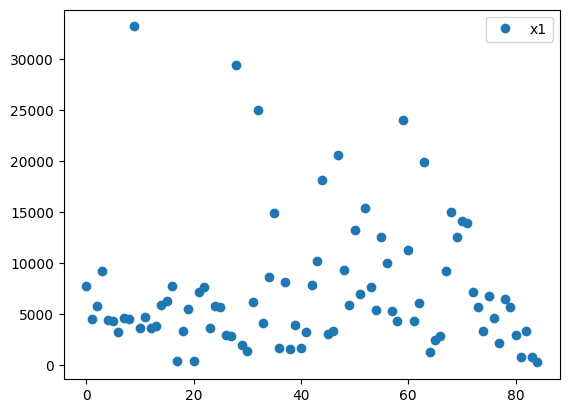

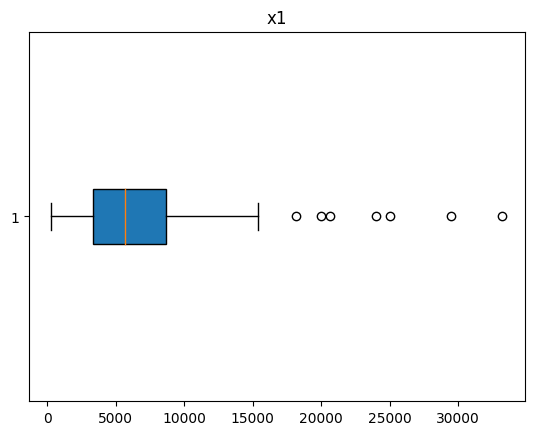

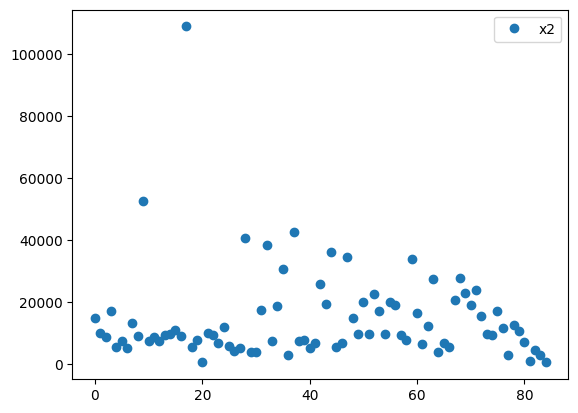

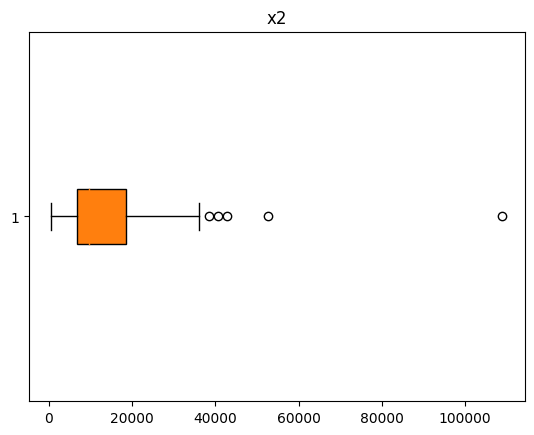

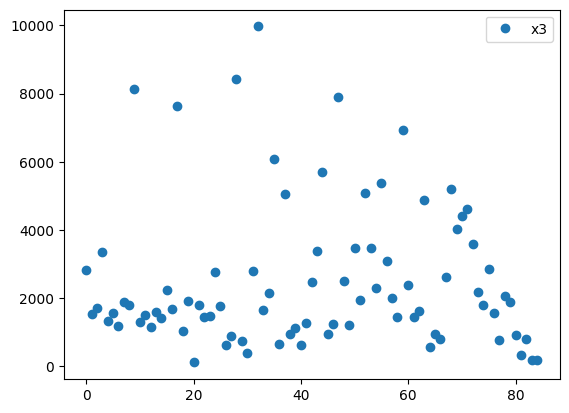

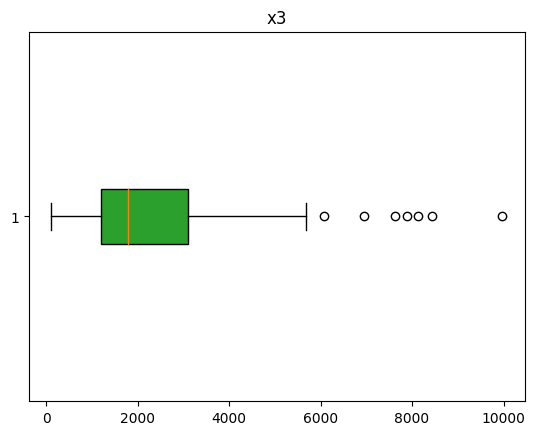

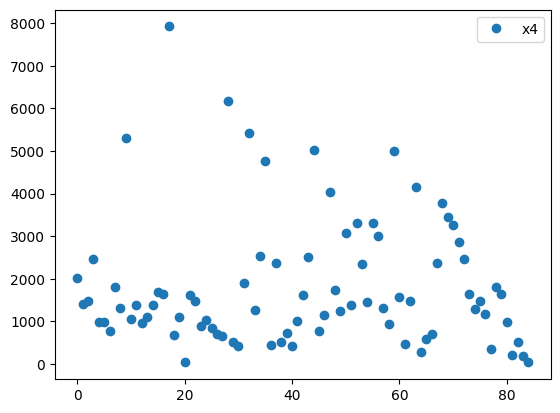

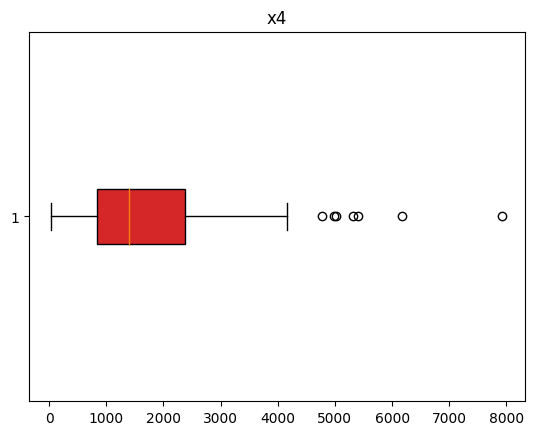

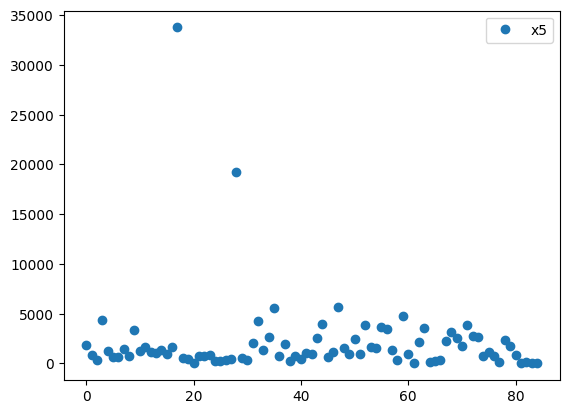

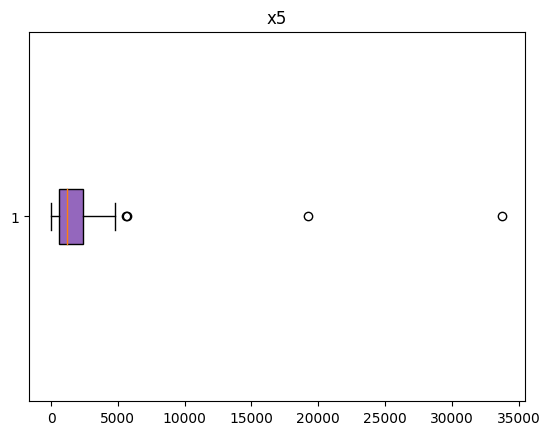

In [70]:
# Визуализация данных и ящики с усами
for category in teacher_categories:
    plt.plot(data_cleaned[category], 'o', label=category)
    plt.legend()
    plt.show()

    fig, ax = plt.subplots()
    ax.set_title(category)
    ax.boxplot(data_cleaned[category], vert=False, patch_artist=True, boxprops=dict(facecolor=plt.get_cmap('tab10')(teacher_categories.index(category))))
    plt.show()

In [71]:
# Блок 10: Использование IsolationForest для обработки выбросов
iso_forest = IsolationForest()
outliers = iso_forest.fit_predict(data_cleaned.loc[:, 'x1':'x5'])

for i in range(len(outliers)):
    if outliers[i] == -1:
        data_cleaned.drop(i, inplace=True)

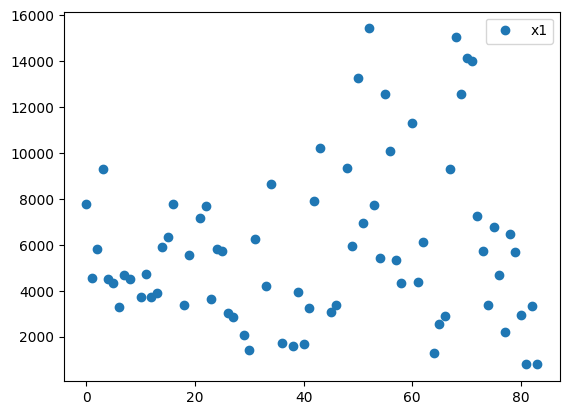

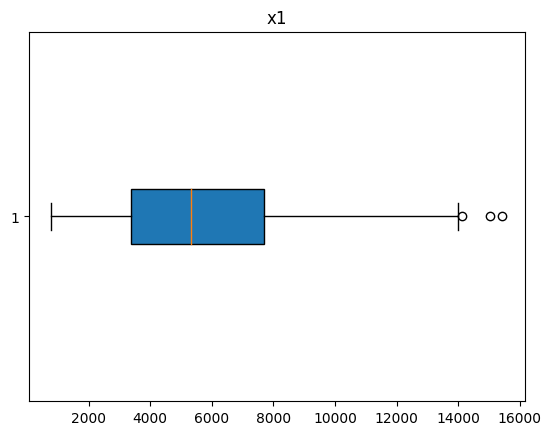

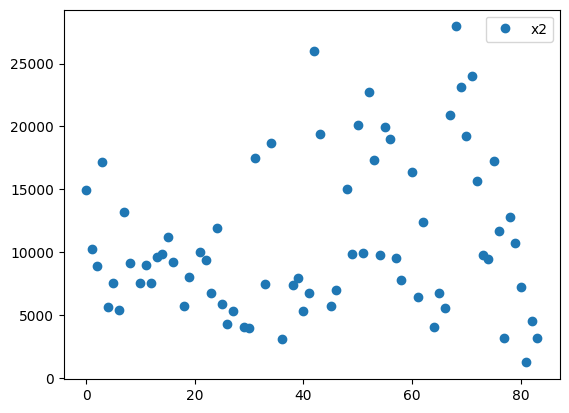

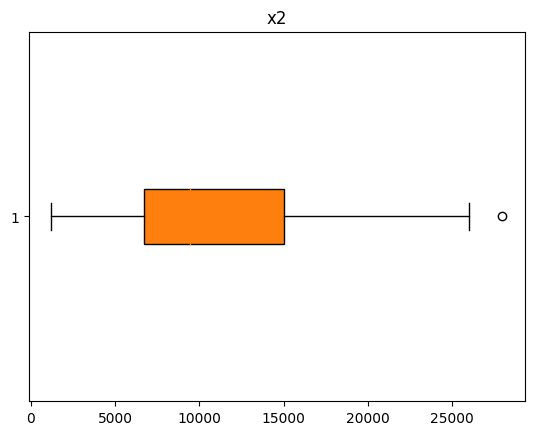

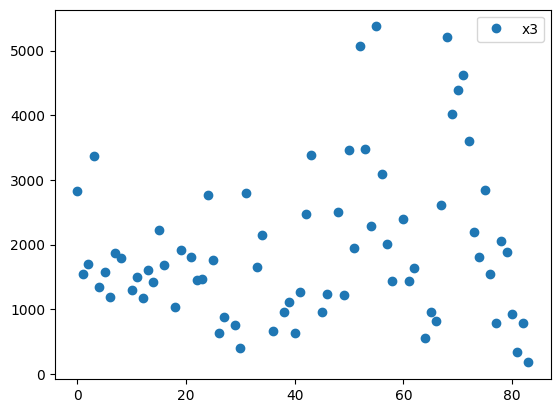

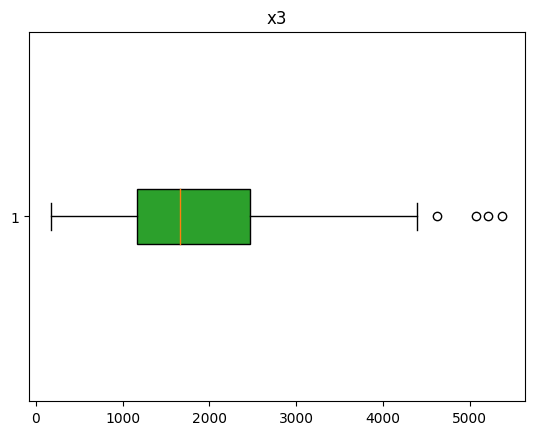

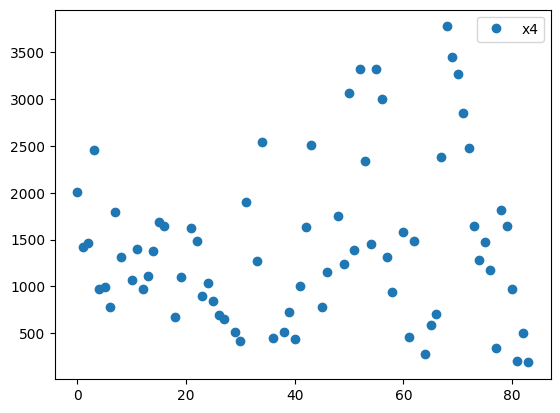

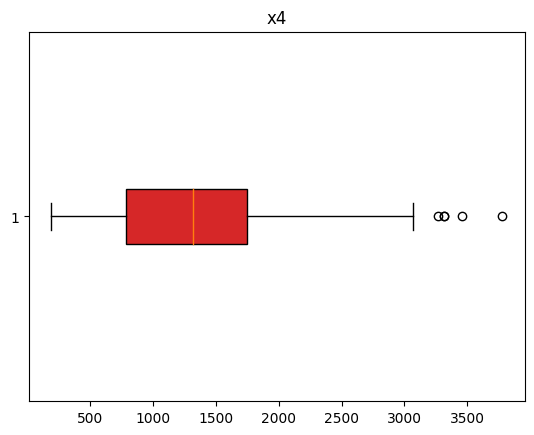

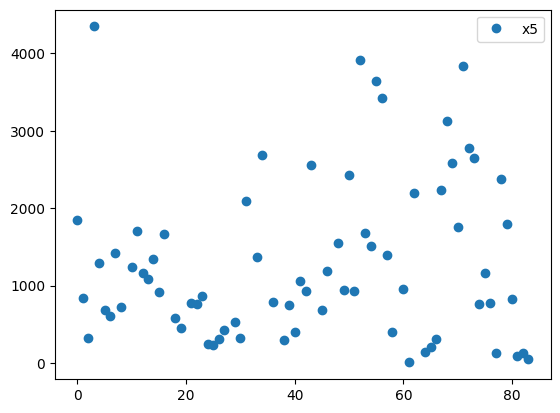

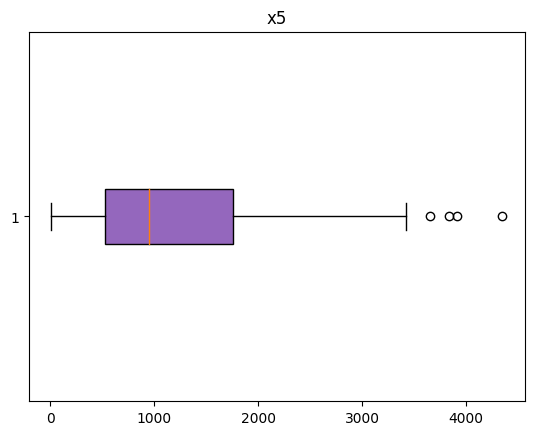

In [72]:
# Повторная визуализация данных после удаления выбросов
for category in teacher_categories:
    plt.plot(data_cleaned[category], 'o', label=category)
    plt.legend()
    plt.show()

    fig, ax = plt.subplots()
    ax.set_title(category)
    ax.boxplot(data_cleaned[category], vert=False, patch_artist=True, boxprops=dict(facecolor=plt.get_cmap('tab10')(teacher_categories.index(category))))
    plt.show()

In [73]:
# Возврат к оригинальным названиям категорий "Округ"
data_cleaned = data_cleaned.rename(columns={'location': 'Округ'})

data_cleaned.loc[:, 'Округ'] = data_cleaned.loc[:, 'Округ'].replace(
    [1., 2., 3., 4., 5., 6., 7., 8.],
    ['center', 'nw', 'south', 'caucasus', 'volga', 'ural', 'siberia', 'dv'])

data_cleaned.head(100)

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
0,Белгородская область,7777.0,14918.0,2825.0,2009.0,1841.0,сenter
1,Брянская область,4560.0,10211.0,1538.0,1418.0,837.0,center
2,Владимирская область,5802.0,8902.0,1703.0,1468.0,320.0,сenter
3,Воронежская область,9292.0,17186.0,3362.0,2458.0,4347.0,сenter
4,Ивановская область,4495.0,5649.0,1338.0,977.0,1288.0,сenter
...,...,...,...,...,...,...,...
79,Хабаровский край,5689.0,10688.0,1877.0,1648.0,1800.0,dv
80,Амурская область,2954.0,7211.0,929.0,977.0,829.0,dv
81,Магаданская область,787.0,1215.0,331.0,202.0,97.0,dv
82,Сахалинская область,3332.0,4511.0,792.0,507.0,131.0,dv


In [74]:
# Вывод статистики и сохранение данных
data_cleaned.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,Округ
count,73,73.0,73.0,73.0,73.0,73.0,73
unique,73,71.0,72.0,72.0,70.0,72.0,9
top,Белгородская область,5802.0,3129.0,961.0,1648.0,320.0,сenter
freq,1,2.0,2.0,2.0,2.0,2.0,15


In [75]:
data_cleaned.to_excel('output.xlsx', index=False)